In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.base import BaseEstimator, TransformerMixin

In [7]:
df = pd.read_csv("/Users/fizzashahtaj/Desktop/archive-2/train.txt", header = None)df.head()

,0
0,i didnt feel humiliated;sadness
1,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wro...
3,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy;anger


In [9]:
df.shape

(16000, 1)

In [11]:
train_dataset = pd.read_csv("/Users/fizzashahtaj/Desktop/archive-2/train.txt" , sep= ';', header=None, names=['Text', 'Sentiment'])
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       16000 non-null  object
 1   Sentiment  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [14]:
test_dataset = pd.read_csv("/Users/fizzashahtaj/Desktop/archive-2/test.txt", sep=';', header=None, names=['Text', 'Sentiment'])
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       2000 non-null   object
 1   Sentiment  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [15]:
validate_dataset= pd.read_csv("/Users/fizzashahtaj/Desktop/archive-2/val.txt" , sep=';', header=None, names=['Text', 'Sentiment'])
validate_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       2000 non-null   object
 1   Sentiment  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [18]:
datasets = ["train", "test", "val"]
data_frames = {}
for dataset in datasets:
    file_path = "/Users/fizzashahtaj/Desktop/archive-2/val.txt"
    data_frames[dataset] = pd.read_csv(
        file_path,
        sep=";",
        header=None,
        names=["text", "Sentiment"]
    )

data_frames["val"]['text_length'] = data_frames["val"]['text'].apply(len)

max_length_index = data_frames["val"]['text_length'].idxmax()

max_length_emotion = data_frames["val"].iloc[max_length_index]['Sentiment']
max_length_text = data_frames["val"].iloc[max_length_index]['text']

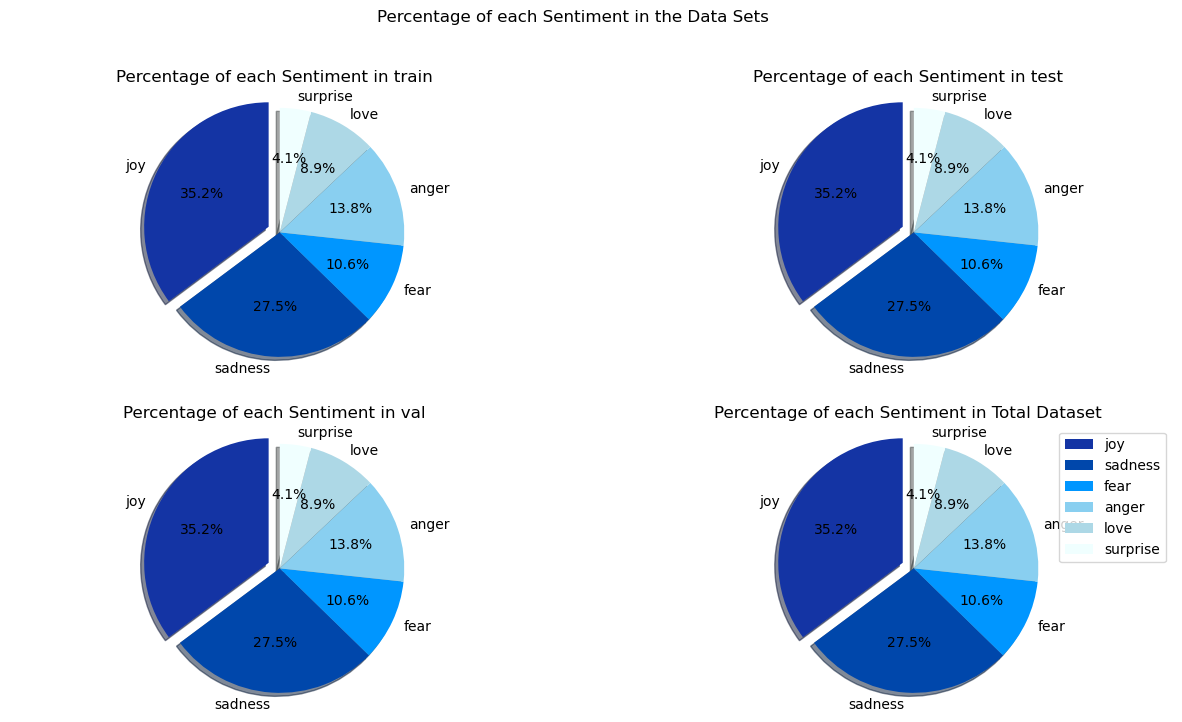

In [19]:
def pie_chart(data_frames):
    combin = ["train", "test", "val"]
    fig, ax = plt.subplots(2, 2, figsize=(15, 8))

    colors = ['#1434A4','#0047AB', '#0096FF', '#89CFF0', '#ADD8E6', '#F0FFFF',]

    for i, dataset in enumerate(combin):
        labels = "joy", "sadness", "fear", "anger", "love", "surprise"
        sizes = [data_frames[dataset]['Sentiment'].value_counts()[i] for i in labels]
        explode = (0.1, 0, 0, 0, 0, 0) 
        row = i // 2
        col = i % 2
        ax[row, col].pie(
            sizes,
            explode=explode,
            labels=labels,
            autopct="%1.1f%%",
            shadow=True,
            startangle=90,
            colors=colors
        )
        ax[row, col].set_title(f"Percentage of each Sentiment in {dataset}")
        ax[row, col].axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Adding the fourth pie chart for the total dataset
    labels = "joy", "sadness", "fear", "anger", "love", "surprise"
    sizes = [sum([data_frames[dataset]['Sentiment'].value_counts()[i] for dataset in combin]) for i in labels]
    explode = (0.1, 0, 0, 0, 0, 0)
    ax[1, 1].pie(
        sizes,
        explode=explode,
        labels=labels,
        autopct="%1.1f%%",
        shadow=True,
        startangle=90,
        colors=colors
    )
    ax[1, 1].set_title("Percentage of each Sentiment in Total Dataset")
    ax[1, 1].axis("equal")

    plt.suptitle("Percentage of each Sentiment in the Data Sets")
    plt.legend()
    plt.show()

pie_chart(data_frames)

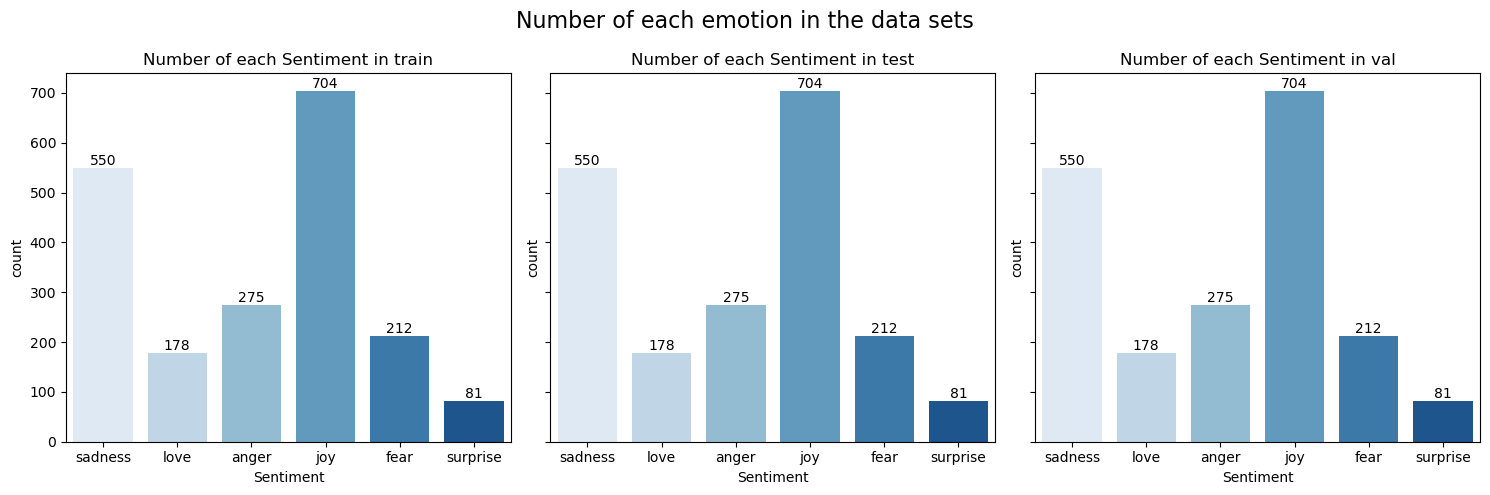

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
def bar_chart(data_frames):
    datasets = ["train", "test", "val"]
    num_datasets = len(datasets)
    fig, ax = plt.subplots(1, num_datasets, figsize=(5 * num_datasets, 5), sharey=True)
    
    # Use a blue color palette
    palette = sns.color_palette("Blues", 6)  # This uses different shades of blue

    for i, dataset in enumerate(datasets):
        sns.countplot(data=data_frames[dataset], x="Sentiment", palette=palette, ax=ax[i])
        ax[i].set_title(f"Number of each Sentiment in {dataset}")

        # Display number of each emotion above the bars
        for p in ax[i].patches:
            ax[i].annotate(
                f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center",
                va="center",
                xytext=(0, 5),
                textcoords="offset points",
            )

    fig.suptitle("Number of each emotion in the data sets", fontsize=16)
    plt.tight_layout()
    plt.show()

bar_chart(data_frames)


In [26]:
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fizzashahtaj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
import warnings
from sklearn.base import BaseEstimator, TransformerMixin
class TextProcessor(BaseEstimator, TransformerMixin):
    def __init__(self, lower=False, stem=False):
        self.lower = lower
        self.stem = stem
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        def text_processing(text):
            processed_text = re.sub('[^a-zA-Z]', ' ', text) # this code removes any non-alphabet characters
            if self.lower:
                processed_text = processed_text.lower()
            processed_text = processed_text.split()
            if self.stem:
                ps = PorterStemmer()
                processed_text = [ps.stem(word) for word in processed_text if word not in set(stopwords.words('english'))]
            processed_text = ' '.join(processed_text)
            return processed_text
        
        return [text_processing(text) for text in X]

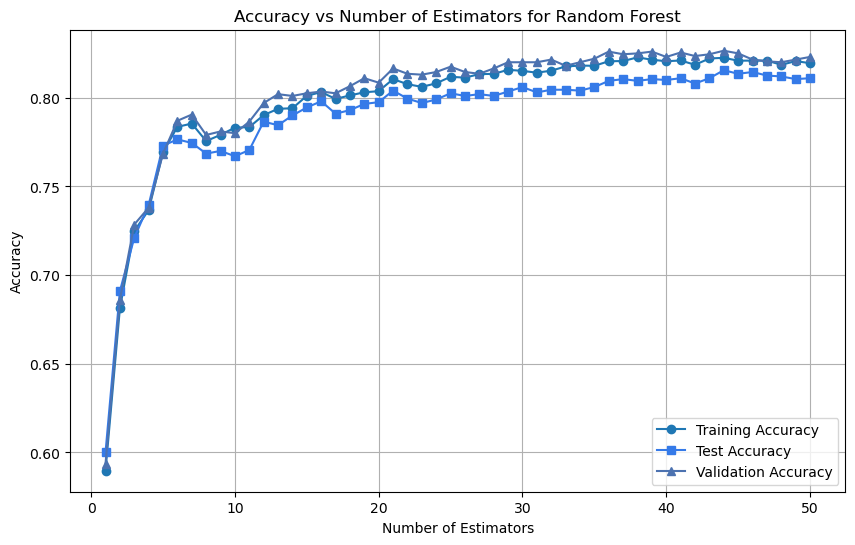

In [44]:
import re
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import joblib
import logging
import warnings

# Suppressing the parallel processing messages
logging.getLogger('joblib').setLevel(logging.ERROR)
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Assuming TextProcessor is a valid class; define or import if needed
# Define the datasets (make sure train_dataset, test_dataset, and validate_dataset are defined)
# For this example, let's assume TextProcessor is defined as a simple placeholder:

class TextProcessor:
    def __init__(self, lower=True, stem=False):
        self.lower = lower
        self.stem = stem

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(lambda x: x.lower() if self.lower else x)

# Define the pipeline
text_processor = TextProcessor(lower=True, stem=False)
vectorizer = CountVectorizer(max_features=3000)
RF = RandomForestClassifier(
    n_estimators=50, random_state=42, n_jobs=-1, verbose=0,
    max_depth=100, min_samples_split=100, min_samples_leaf=5, max_features='sqrt'
)

pipeline = Pipeline([
    ("text_processing", text_processor),
    ("vectorizer", vectorizer),
    ("classifier", RF)
])

# Fit the pipeline
pipeline.fit(train_dataset['Text'], train_dataset['Sentiment'])

train_accuracies = []
test_accuracies = []
val_accuracies = []

for i in range(1, 51):
    RF.set_params(n_estimators=i)
    pipeline.fit(train_dataset['Text'], train_dataset['Sentiment'])
    
    # Accuracy for training set
    train_pred = pipeline.predict(train_dataset['Text'])
    train_accuracy = accuracy_score(train_dataset['Sentiment'], train_pred)
    train_accuracies.append(train_accuracy)
    
    # Accuracy for test set
    test_pred = pipeline.predict(test_dataset['Text'])
    test_accuracy = accuracy_score(test_dataset['Sentiment'], test_pred)
    test_accuracies.append(test_accuracy)
    
    # Accuracy for validation set
    val_pred = pipeline.predict(validate_dataset['Text'])
    val_accuracy = accuracy_score(validate_dataset['Sentiment'], val_pred)
    val_accuracies.append(val_accuracy)

# Define blue shades for the plot
blue_shades = ["#1f77b4", "#357ae8", "#4c72b0", "#6baed6", "#9ecae1", "#c6dbef"]

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), train_accuracies, color=blue_shades[0], label='Training Accuracy', marker='o')
plt.plot(range(1, 51), test_accuracies, color=blue_shades[1], label='Test Accuracy', marker='s')
plt.plot(range(1, 51), val_accuracies, color=blue_shades[2], label='Validation Accuracy', marker='^')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators for Random Forest')
plt.legend()
plt.grid(True)
plt.show()

    

In [45]:
print("Train set accuracy:", train_accuracy)

print("Test set accuracy:", test_accuracy)

print("Validation set accuracy:", val_accuracy)

Train set accuracy: 0.8195
Test set accuracy: 0.811
Validation set accuracy: 0.823


Train Classification Report:
               precision    recall  f1-score   support

       anger       0.90      0.76      0.82      2159
        fear       0.82      0.80      0.81      1937
         joy       0.72      0.96      0.82      5362
        love       0.90      0.61      0.73      1304
     sadness       0.94      0.78      0.85      4666
    surprise       0.91      0.62      0.73       572

    accuracy                           0.82     16000
   macro avg       0.86      0.75      0.79     16000
weighted avg       0.84      0.82      0.82     16000

Validation Classification Report:
               precision    recall  f1-score   support

       anger       0.90      0.73      0.80       275
        fear       0.82      0.77      0.79       212
         joy       0.74      0.96      0.84       704
        love       0.92      0.68      0.78       178
     sadness       0.91      0.78      0.84       550
    surprise       0.92      0.70      0.80        81

    accuracy

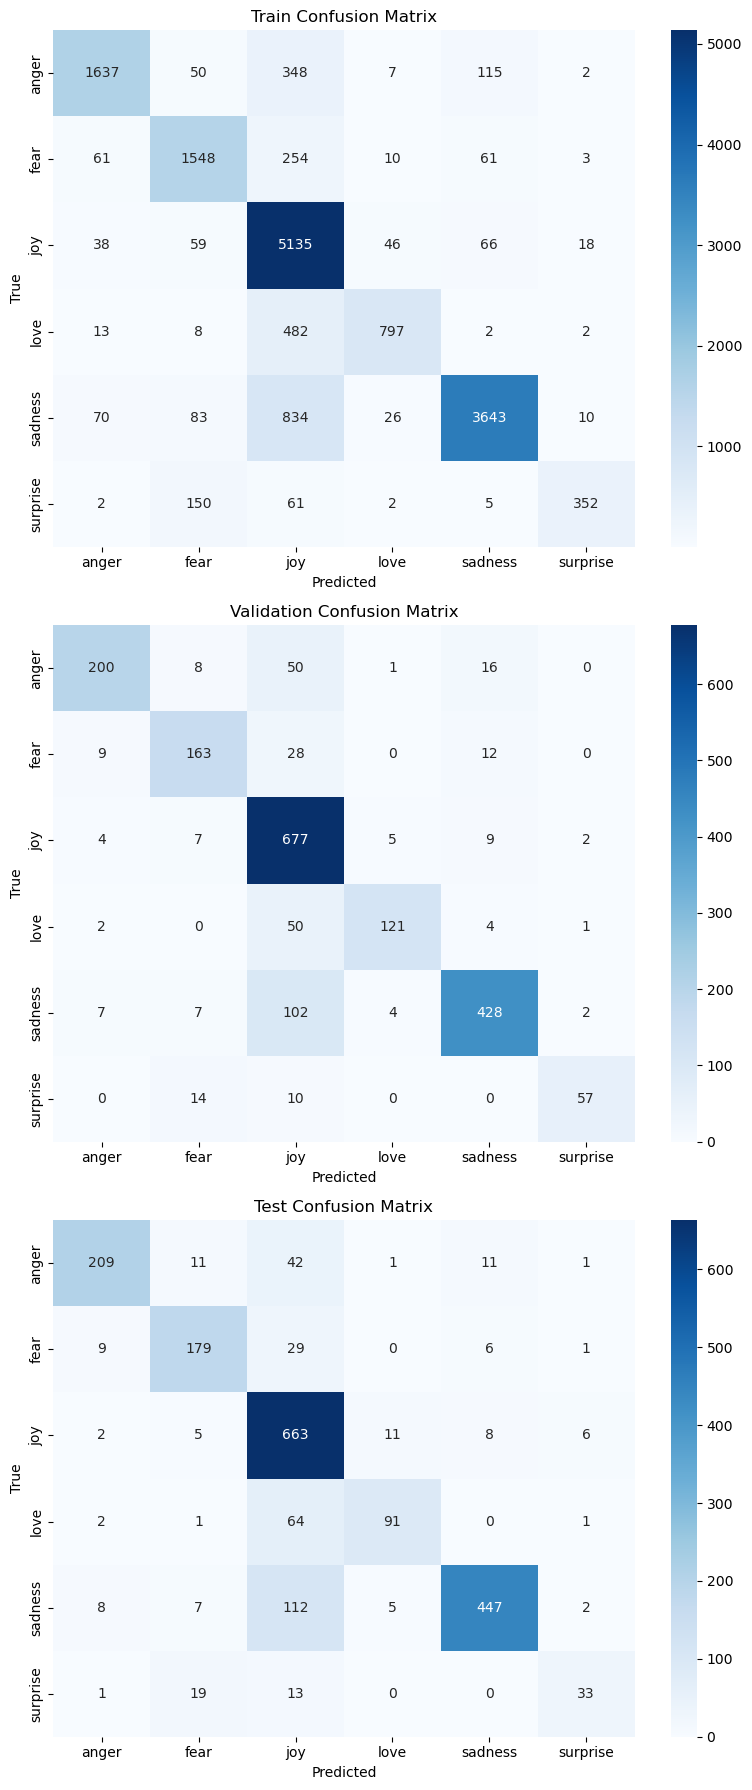

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrices_and_classification_report(train_true, train_pred, val_true, val_pred, test_true, test_pred, labels):
    # Compute confusion matrices
    train_conf_matrix = confusion_matrix(train_true, train_pred)
    val_conf_matrix = confusion_matrix(val_true, val_pred)
    test_conf_matrix = confusion_matrix(test_true, test_pred)

    # Print classification reports
    print("Train Classification Report:\n", classification_report(train_true, train_pred, target_names=labels))
    print("Validation Classification Report:\n", classification_report(val_true, val_pred, target_names=labels))
    print("Test Classification Report:\n", classification_report(test_true, test_pred, target_names=labels))

    # Plot confusion matrices
    fig, axes = plt.subplots(3, 1, figsize=(8, 18))

    sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, yticklabels=labels, ax=axes[0])
    axes[0].set_title('Train Confusion Matrix')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('True')

    sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, yticklabels=labels, ax=axes[1])
    axes[1].set_title('Validation Confusion Matrix')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('True')

    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, yticklabels=labels, ax=axes[2])
    axes[2].set_title('Test Confusion Matrix')
    axes[2].set_xlabel('Predicted')
    axes[2].set_ylabel('True')

    plt.tight_layout()
    plt.show()
plot_confusion_matrices_and_classification_report(
    train_dataset['Sentiment'], train_pred,
    validate_dataset['Sentiment'], val_pred,
    test_dataset['Sentiment'], test_pred,
    pipeline.classes_
)
